## Prediction using Supervised ML

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Importing the Linear Regression Model from sklearn

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

### Importing Student data(number of hours vs marks scored)

In [3]:
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting the student study hours/day vs marks percentage obtained

<function matplotlib.pyplot.show(close=None, block=None)>

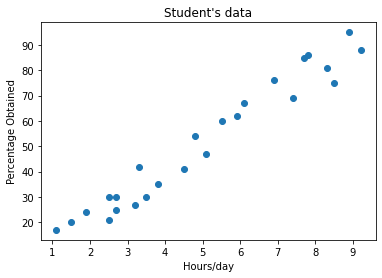

In [5]:
plt.scatter(x=data["Hours"] , y=data["Scores"])
plt.xlabel("Hours/day")
plt.ylabel("Percentage Obtained")
plt.title("Student's data")
plt.show

Clearly the data follows a linear trend. There's a linear relationship between percentage and hours stidied by a student. So using Linear Regression to predict percentage from hours studied per day.

The given data is clean. We will proceed with splitting the data into 2 parts to avoid over fitting and evaluate our model i.e Train data (which we will use to prepare our linear regression model) and Test data(We'll take 20% of data to test our model formed by later comparing it with predicted data)


In [6]:
x=data["Hours"].values.reshape(-1,1)  
y=data["Scores"].values.reshape(-1,1)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.2,random_state=0)

In [8]:
print(x_train.shape,x_test.shape)

(20, 1) (5, 1)


Fitting our data into a linear regression model i.e. forming an equation of form y=b0+b1(x) which has minimum squared error sum from all points of data

In [9]:
reg=LinearRegression().fit(x_train,y_train)
reg

LinearRegression()

### The linear regression will have following intercept and coefficient using which we can find our best fit line:

In [14]:
print("Coefficient of regression line",reg.coef_)
print("Intercept of regression line",reg.intercept_)

Coefficient of regression line [[9.91065648]]
Intercept of regression line [2.01816004]


In [15]:
# Finding best fit line
x1=data.iloc[:,:-1].values
line = (reg.coef_*x1+reg.intercept_)

Plotting line and scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

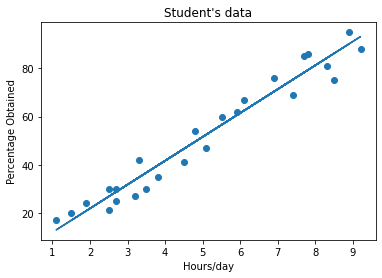

In [16]:
plt.scatter(x=data["Hours"] , y=data["Scores"] )
plt.plot(x1,line.ravel())
plt.xlabel("Hours/day")
plt.ylabel("Percentage Obtained")
plt.title("Student's data")
plt.show

Predicting data for evaluating our model

In [17]:
y_predict=reg.predict(x_test)


Let's compare the actual data with predicted data i.e. y_test and y_predict

In [19]:
df = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_predict.ravel()})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Calculating mean squared error using y_test and y_predict. We can compare our different algorithms or models using this. Lesser the error better is the model

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [21]:
mean_squared_error(y_test,y_predict)

21.5987693072174

In [30]:
#if study hours=9.25/day
s_marks=reg.predict([[9.25]])
print('{:.2f}'.format(s_marks[0][0]))

93.69


From our model we have that if a student studies 9.25 hours per day it will score 93.69 %

If there were more than 1 variables effecting the marks obtained by a student we could have used ANOVA table to check the significance of each variable in the model formed

In [31]:
import statsmodels.api as s
t=s.add_constant(x_train)
model=s.OLS(y_train,t)
result1=model.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           2.79e-13
Time:                        00:17:10   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""